##### Import packages

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Preprocessing

##### Deciding dataset

In [ ]:
ds1 = pd.read_csv('sample_dataset.csv')
ds1.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics


In [ ]:
ds1.columns

Index(['Customer ID', 'Name', 'Surname', 'Gender', 'Birthdate',
       'Transaction Amount', 'Date', 'Merchant Name', 'Category'],
      dtype='object')

missing columns:
 - Transaction_ID
 - Units_Purchased
 - Payment_Type
 - Region

In [ ]:
ds2 = pd.read_csv('sales_data_sample.csv', encoding='latin1')
ds2.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
ds2.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

missing columns:
 - Customer_ID
 - Payment_Type

In [ ]:
ds3 = pd.read_excel('Online Retail.xlsx')
ds3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
ds3.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

missing columns:
 - Payment_Type

**We will work on the third dataset**

### Loading and preparing dataset

In [21]:
data = pd.read_excel('Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [22]:
data.shape

(541909, 8)

###### Add needed columns

In [23]:
data['Amount_Spent'] = data['Quantity'] * data['UnitPrice']

0: Credit Card

1: Debit Card

2: Cash

3: Digital Wallet (e.g., PayPal)

4: Bank Transfer


In [24]:
payment_types = [0, 1, 2, 3, 4]

In [25]:
data['Payment_Type'] = np.random.choice(payment_types, size=len(data))

###### Rename columns


In [26]:
mapping = {
    'InvoiceNo': 'Transaction_ID',
    'InvoiceDate': 'Date',
    'CustomerID': 'Customer_ID',
    'Description': 'Product_Category',
    'Quantity': 'Units_Purchased',
    'Country': 'Region'
}


In [27]:
data.rename(mapping, axis=1, inplace=True)
data.head()

,Transaction_ID,StockCode,Product_Category,Units_Purchased,Date,UnitPrice,Customer_ID,Region,Amount_Spent,Payment_Type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2


###### Drop unwanted columns

In [28]:
data.drop(['StockCode', 'UnitPrice'], axis=1, inplace=True)
data.head()

,Transaction_ID,Product_Category,Units_Purchased,Date,Customer_ID,Region,Amount_Spent,Payment_Type
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,17850.0,United Kingdom,15.30,0
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,0
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,17850.0,United Kingdom,22.00,0
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,2
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,2


###  'Date' column to datetime format

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    541909 non-null  object        
 1   Product_Category  540455 non-null  object        
 2   Units_Purchased   541909 non-null  int64         
 3   Date              541909 non-null  datetime64[ns]
 4   Customer_ID       406829 non-null  float64       
 5   Region            541909 non-null  object        
 6   Amount_Spent      541909 non-null  float64       
 7   Payment_Type      541909 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 33.1+ MB


Date column is already in datetime format

### check for & handle missing values

In [30]:
data.isnull().sum()

,0
Transaction_ID,0
Product_Category,1454
Units_Purchased,0
Date,0
Customer_ID,135080
Region,0
Amount_Spent,0
Payment_Type,0


In [31]:
data.dropna(inplace=True)

In [32]:
data.shape

(406829, 8)

### Remove duplicate transactions

In [33]:
data = data.drop_duplicates()

In [34]:
data.shape

(405683, 8)

### Extract year, month, and weekday from the 'Date' column

In [35]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['weekday'] = data['Date'].dt.weekday

data.head()

,Transaction_ID,Product_Category,Units_Purchased,Date,Customer_ID,Region,Amount_Spent,Payment_Type,year,month,weekday
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,17850.0,United Kingdom,15.30,0,2010,12,2
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,0,2010,12,2
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,17850.0,United Kingdom,22.00,0,2010,12,2
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,2,2010,12,2
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,2,2010,12,2


## Data Analysis

### Calculate total revenue and average transaction value.


In [36]:
data['Amount_Spent'].sum()

np.float64(8295441.544)

In [37]:
data['Amount_Spent'].mean()

np.float64(20.448087654646606)

### Identify the top 3 most popular product categories

In [38]:
data['Product_Category'].value_counts().head(3)

,count
Product_Category,
WHITE HANGING HEART T-LIGHT HOLDER,2069
REGENCY CAKESTAND 3 TIER,1900
JUMBO BAG RED RETROSPOT,1662


### Determine the most frequently used payment type

In [39]:
data['Payment_Type'].value_counts().idxmax()

np.int64(1)

Credit card

###  Compute monthly sales growth rate

In [40]:
data.groupby(data['month'])['Amount_Spent'].sum()

,Amount_Spent
month,
1,474742.780
2,436272.730
3,579700.860
4,425859.671
5,648006.500
6,607757.970
7,574017.301
8,616214.850
9,931194.302


### Identify the top 5 highest spending customers

In [41]:
data.groupby('Customer_ID')['Amount_Spent'].sum().sort_values(ascending=False).head(5)

,Amount_Spent
Customer_ID,
14646.0,279489.02
18102.0,256438.49
17450.0,187482.17
14911.0,132521.62
12415.0,123725.45


### Determine the busiest sales day of the week

In [42]:
data.groupby('weekday')['Amount_Spent'].sum().idxmax()

np.int32(3)

Thursday

## Advanced Data Visualization

### Line Chart: Display monthly revenue trends for each product category

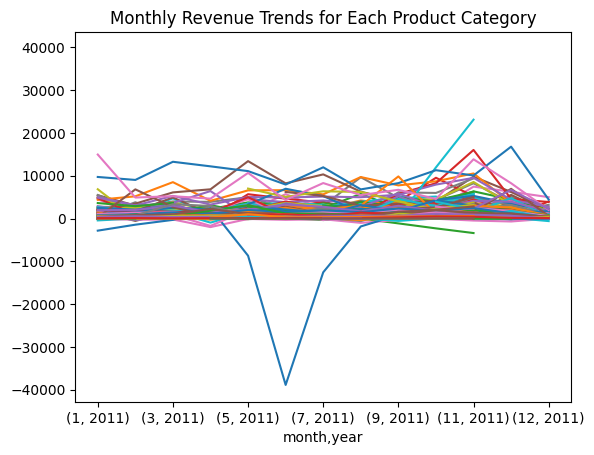

In [51]:
monthly_revenue = data.groupby(['year', 'month', 'Product_Category'])['Amount_Spent'].sum().reset_index()
monthly_revenue_pivot = monthly_revenue.pivot_table(index=['month', 'year'], columns='Product_Category', values='Amount_Spent')
monthly_revenue_pivot.plot(kind='line',legend=False)
plt.title('Monthly Revenue Trends for Each Product Category')
plt.show()

In [50]:
data['Product_Category'].nunique()

3896

In [52]:
data['year'].unique()

array([2010, 2011], dtype=int32)

In [55]:
data[data['Amount_Spent']<0]['Amount_Spent']

,Amount_Spent
141,-27.50
154,-4.65
235,-19.80
236,-6.96
237,-6.96
...,...
540449,-9.13
541541,-224.69
541715,-54.75
541716,-1.25


### Pie Chart: Show the distribution of sales by payment type

In [56]:
payment_distribution = data.groupby('Payment_Type')['Amount_Spent'].sum()

([<matplotlib.patches.Wedge at 0x7d4b36914710>,
 [Text(0.8569221613859268, 0.6896987815892326, '0'),
  Text(-0.46431962009050265, 0.9971997244278658, '1'),
  Text(-1.0906532780384515, -0.14309237262684807, '2'),
  Text(-0.21285158621198094, -1.0792099898754848, '3'),
  Text(0.9278041689167954, -0.5909140581680342, '4')],
 [Text(0.4674120880286873, 0.37619933541230866, '21.6%'),
  Text(-0.2532652473220923, 0.5439271224151995, '20.7%'),
  Text(-0.5949017880209734, -0.07805038506918985, '19.6%'),
  Text(-0.11610086520653505, -0.588659994477537, '20.1%'),
  Text(0.5060750012273428, -0.3223167590007459, '18.1%')])

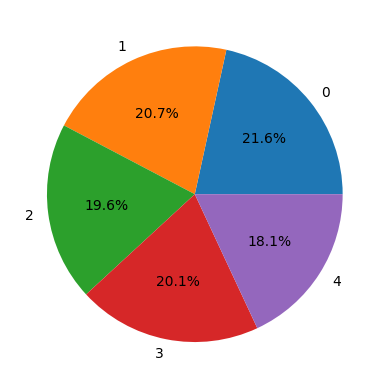

In [60]:
plt.pie(payment_distribution, labels=payment_distribution.index, autopct='%1.1f%%')

*Remember*

0: Credit Card

1: Debit Card

2: Cash

3: Digital Wallet (e.g., PayPal)

4: Bank Transfer

### Histogram: Illustrate the distribution of transaction amounts

Text(0.5, 1.0, 'Distribution of Transaction Amounts')

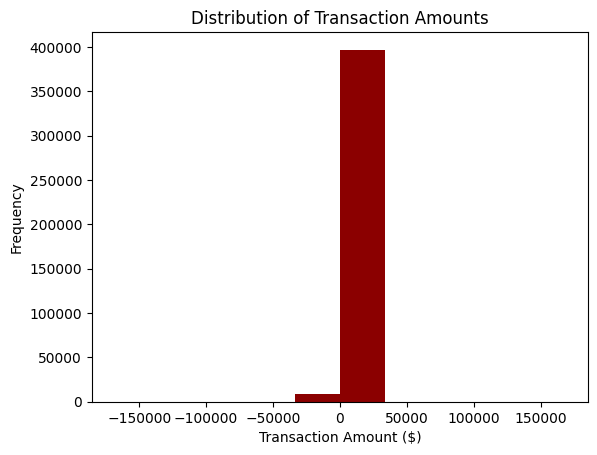

In [77]:
plt.hist(data['Amount_Spent'], color='darkred')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')


###  Area Chart: Compare sales performance across different regions over time

In [83]:
sales_by_region = data[data['Amount_Spent'] >= 0].groupby(['year', 'month', 'Region'])['Amount_Spent'].sum().reset_index()

In [84]:
sales_pivot = sales_by_region.pivot_table(index=['month', 'year'], columns='Region', values='Amount_Spent', fill_value=0)


In [85]:
sales_pivot

,Region,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
month,year,,,,,,,,,,,,,,,,,,,,,
1,2011,9017.71,0.00,0.0,1200.20,0.0,0.00,675.58,539.10,0.00,0.00,...,0.00,0.00,2053.07,10086.09,3486.32,4231.23,0.00,0.00,441866.860,0.00
2,2011,14695.42,518.36,0.0,2181.07,0.0,0.00,1784.71,4334.24,549.26,399.22,...,0.00,145.92,0.00,2114.50,509.50,2654.92,0.00,889.24,355367.360,0.00
3,2011,17223.99,1708.12,0.0,3351.98,0.0,140.54,3509.33,938.39,0.00,3978.99,...,0.00,0.00,0.00,5363.15,4720.58,1870.23,0.00,0.00,466934.840,0.00
4,2011,771.60,680.78,0.0,1989.48,1143.6,0.00,293.00,0.00,0.00,0.00,...,0.00,0.00,8209.58,1785.65,809.10,2076.94,383.95,0.00,409370.961,299.10
5,2011,13638.41,1249.43,548.4,2732.40,0.0,534.24,1207.24,0.00,0.00,515.70,...,0.00,0.00,0.00,3257.60,2681.98,3610.01,0.00,0.00,551340.740,852.68
6,2011,25187.77,0.00,0.0,4274.82,0.0,1171.46,2060.03,1109.32,0.00,3261.15,...,0.00,0.00,0.00,3333.21,832.00,7904.15,0.00,0.00,524660.290,185.78
7,2011,4964.38,1191.95,0.0,2475.57,0.0,1768.58,0.00,0.00,0.00,376.24,...,0.00,0.00,3949.32,7624.92,6802.09,3762.65,0.00,0.00,485444.571,795.98
8,2011,22489.20,1516.08,0.0,3554.02,0.0,51.56,4896.78,0.00,0.00,213.15,...,0.00,0.00,0.00,3344.96,1400.86,4969.89,0.00,0.00,498312.120,531.03
9,2011,5106.73,0.00,0.0,4208.02,0.0,0.00,1323.75,196.35,0.00,4570.16,...,0.00,0.00,0.00,5189.24,4575.21,8284.86,0.00,1013.04,796527.852,0.00


<Axes: xlabel='month,year'>

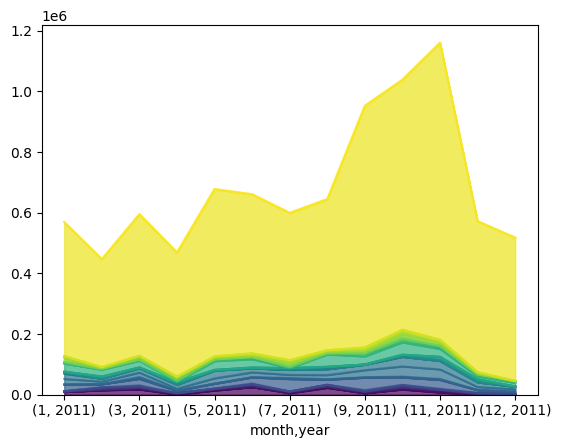

In [87]:
sales_pivot.plot(kind='area', stacked=True, alpha=0.7, cmap='viridis', legend=False)


## Bonus challenge

### Calculate customer retention rate based on repeat purchases

$$ CRR = \left(\frac{\text{Repeat Customers}}{\text{Total Customers}}\right) \times 100 $$

In [88]:
total_customers = data['Customer_ID'].nunique()

In [90]:
repeat_customers = data['Customer_ID'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1].count()

In [91]:
customer_retention_rate = (repeat_customers / total_customers) * 100

In [92]:
print(f"Customer Retention Rate: {customer_retention_rate:.2f}%")

Customer Retention Rate: 98.19%


### Compare average spending per region

In [96]:
avg_spending_per_region = data.groupby('Region')['Amount_Spent'].mean().reset_index()
avg_spending_per_region.columns = ['Region', 'Avg_Amount_Spent']
avg_spending_per_region

,Region,Avg_Amount_Spent
0,Australia,108.910787
1,Austria,25.322494
2,Bahrain,32.258824
3,Belgium,19.773301
4,Brazil,35.737500
5,Canada,24.280662
6,Channel Islands,26.499063
7,Cyprus,20.854346
8,Czech Republic,23.590667
9,Denmark,48.247147


<Axes: title={'center': 'Avg_Amount_Spent'}>

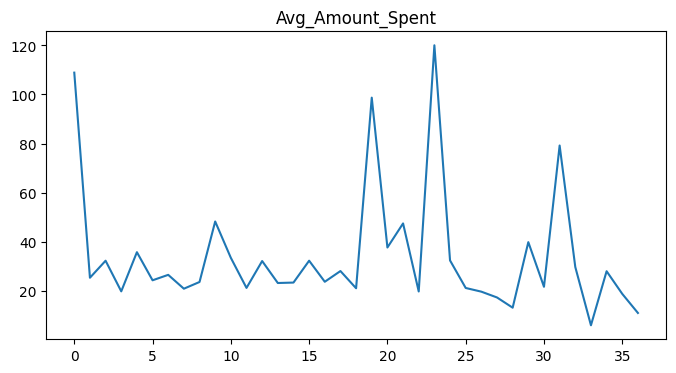

In [103]:
avg_spending_per_region['Avg_Amount_Spent'].plot(kind='line', figsize=(8, 4), title='Avg_Amount_Spent')

### Analyze the correlation between the number of units purchased and the total amount spent

In [105]:
correlation = data['Units_Purchased'].corr(data['Amount_Spent'])
correlation

np.float64(0.9160961121295637)

<Axes: xlabel='Units_Purchased', ylabel='Amount_Spent'>

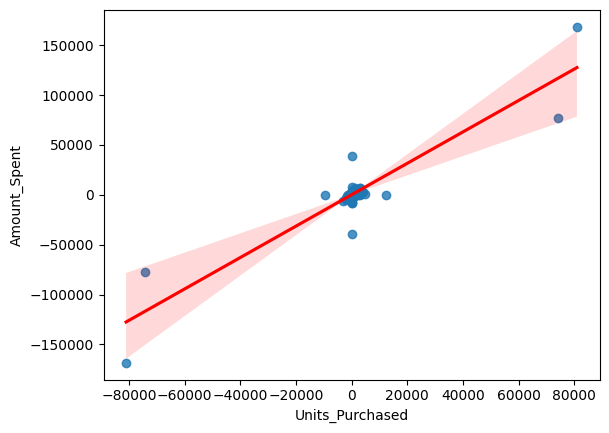

In [107]:
sns.regplot(x=data['Units_Purchased'], y=data['Amount_Spent'],  line_kws={'color':'red'})


### Create a heatmap using Seaborn to show sales trends by weekday and hour

In [111]:
data['hour'] = data['Date'].dt.hour
sales_by_weekday_hour = data.groupby(['weekday', 'hour'])['Amount_Spent'].sum().unstack()

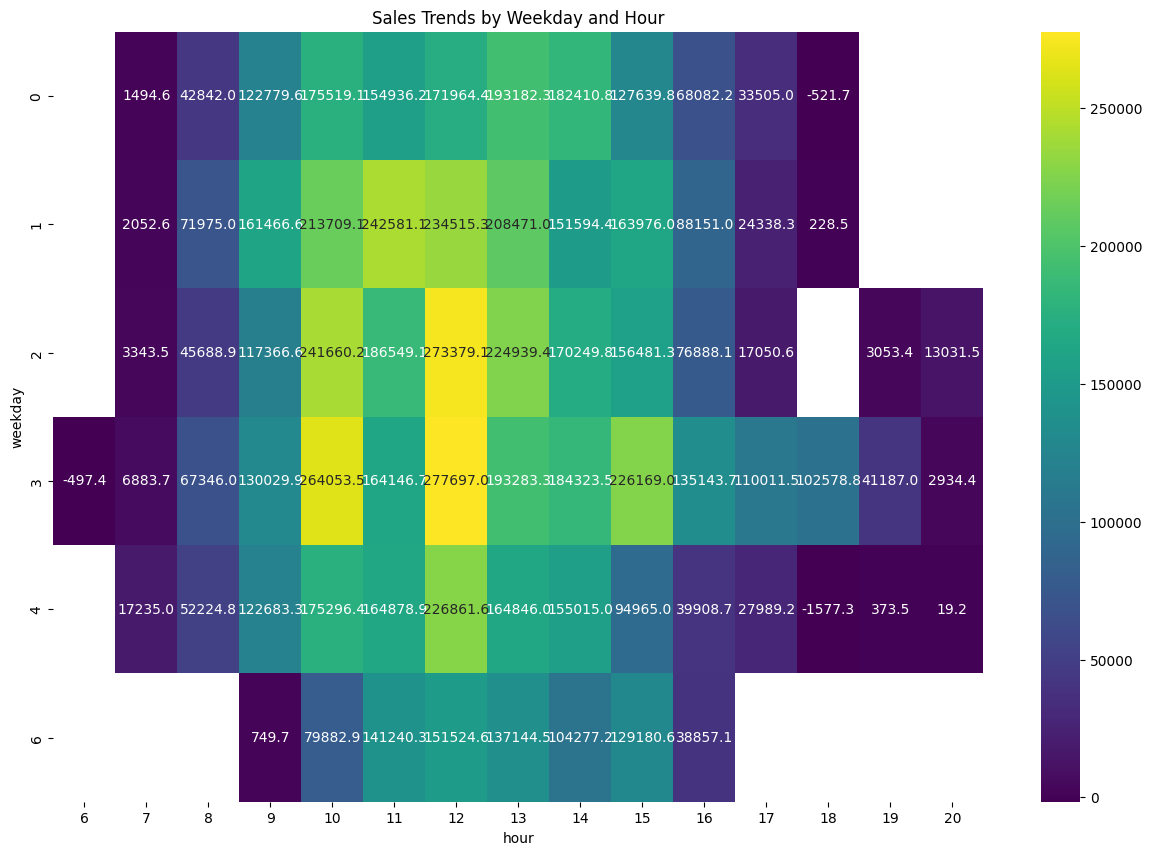

In [129]:
plt.figure(figsize=(15, 10))
sns.heatmap(sales_by_weekday_hour, cmap='viridis', annot=True, fmt=".1f")
plt.title('Sales Trends by Weekday and Hour')
plt.show()


# **************

⭐ *Thanks*